In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

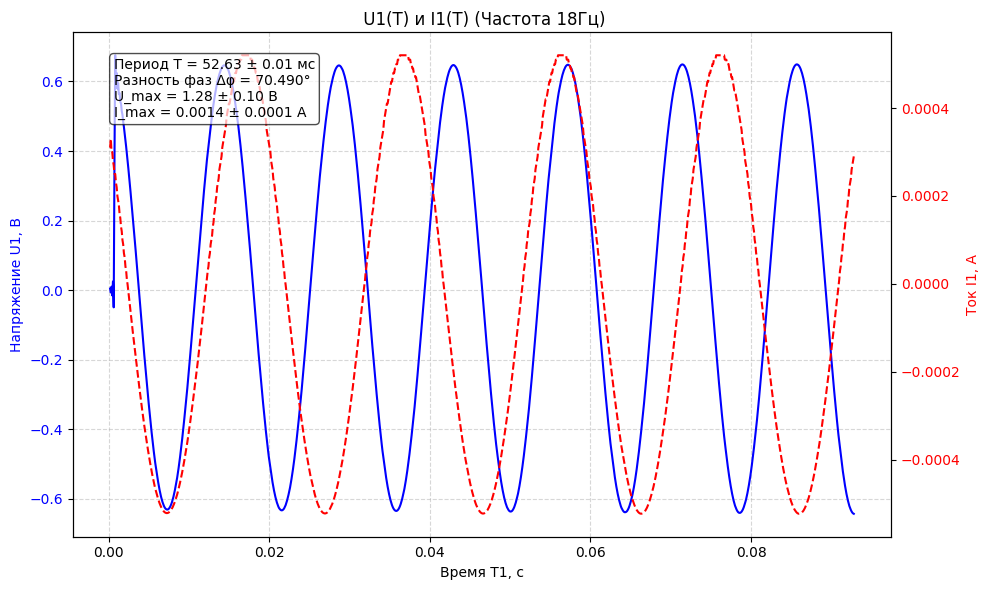

In [38]:
df = pd.read_excel('lab8_2.xlsx')

t_data = df['T1']
u_data = df['U1']
i_data = df['I1']


# подпись
f_val = df['F'].iloc[0]
T_ms = (1/f_val) * 1000
sigma_T = 0.01
d_phi = df['Ph1'].iloc[0]
u_max = df['U1Max'].iloc[0]
i_max = df['I1Max'].iloc[0]


fig, ax1 = plt.subplots(figsize=(10, 6))

# Напряжение
ax1.plot(t_data, u_data, color='blue', label='U1(t) - Частота 18Гц', linewidth=1.5)
ax1.set_xlabel('Время T1, с')
ax1.set_ylabel('Напряжение U1, В', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Ток
ax2 = ax1.twinx()
ax2.plot(t_data, i_data, color='red', linestyle='--', label='I1(t) - Частота 18Гц', linewidth=1.5)
ax2.set_ylabel('Ток I1, А', color='red')
ax2.tick_params(axis='y', labelcolor='red')
import math
# Аннотация
info_text = (f"Период T = {T_ms:.2f} ± {sigma_T} мс\n"
             f"Разность фаз Δφ = {360 * d_phi/(math.pi*2):.3f}°\n"
             f"U_max = {u_max:.2f} ± 0.10 В\n"
             f"I_max = {i_max:.4f} ± 0.0001 А")

plt.text(0.05, 0.95, info_text, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.title(' U1(T) и I1(T) (Частота 18Гц)')
fig.tight_layout()
plt.savefig('1_2.png')
plt.show()

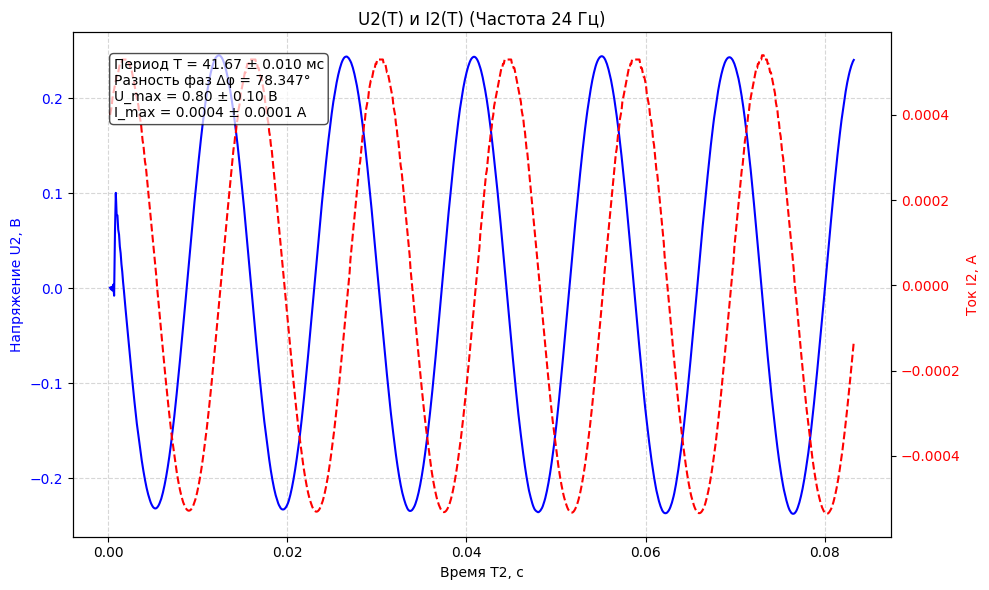

In [ ]:
idx = 1

t_data = df['T2']
u_data = df['U2']
i_data = df['I2']

f_val = df['F'].iloc[idx]
T_ms = (1/f_val) * 1000

sigma_T = 0.005 / (f_val**2) * 1000

d_phi = df['Ph2'].iloc[0]
u_max = 0.8
i_max = df['I2'].iloc[idx]

fig, ax1 = plt.subplots(figsize=(10, 6))

t_end = (2 / f_val)
mask = t_data <= t_end

# Напряжение
ax1.plot(t_data[mask], u_data[mask], color='blue', label=f'U2(t) - {f_val}Гц', linewidth=1.5)
ax1.set_xlabel('Время T2, с')
ax1.set_ylabel('Напряжение U2, В', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Ток
ax2 = ax1.twinx()
ax2.plot(t_data[mask], i_data[mask], color='red', linestyle='--', label=f'I2(t) - {f_val}Гц', linewidth=1.5)
ax2.set_ylabel('Ток I2, А', color='red')
ax2.tick_params(axis='y', labelcolor='red')



# подпись
info_text = (
             f"Период T = {T_ms:.2f} ± {0.01:.3f} мс\n"
             f"Разность фаз Δφ = {360*d_phi/(2*math.pi):.3f}°\n"
             f"U_max = {u_max:.2f} ± 0.10 В\n"
             f"I_max = {i_max:.4f} ± 0.0001 А")

plt.text(0.05, 0.95, info_text, transform=ax1.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.title('U2(T) и I2(T) (Частота 24 Гц)')
fig.tight_layout()
plt.savefig('2_2.png')
plt.show()

In [ ]:
sigma_f = 0.5
df['T_ms'] = (1 / df['F']) * 1000
df['d_T_ms'] = (sigma_f / (df['F']**2)) * 1000

print("Результаты расчета периода:")
print(df[['F', 'T_ms', 'd_T_ms']].head())

T_avg = df['T_ms'].mean()
print(f"\nСредний период по всей работе: {T_avg:.2f} мс")

Результаты расчета периода:
      F       T_ms  sigma_T_ms
0  19.0  52.631579    1.385042
1  24.0  41.666667    0.868056
2  25.0  40.000000    0.800000
3  30.0  33.333333    0.555556
4  35.0  28.571429    0.408163

Средний период по всей работе: 21.97 мс


In [ ]:
df.columns

Index(['F', 'FTemp', 'I1', 'I1Max', 'I1Max4', 'I1T', 'I2', 'IOm', 'L', 'LF',
       'LZ', 'Per1                     Per2', 'Ph1', 'Ph2', 'R', 'T1', 'T1T',
       'T2', 'T3', 'U1', 'U1Max', 'U1Max4', 'U1T', 'U2', 'U2T', 'U3', 'U4',
       'U5', 'U6', 'UOm', 'X', 'XTemp', 'Z', 'ZI', 'ZU', 'tp1', 'tp2', 'tp3',
       'tp4', 'tpf1', 'tpf2', 'tpf3                     tpf4'],
      dtype='object')

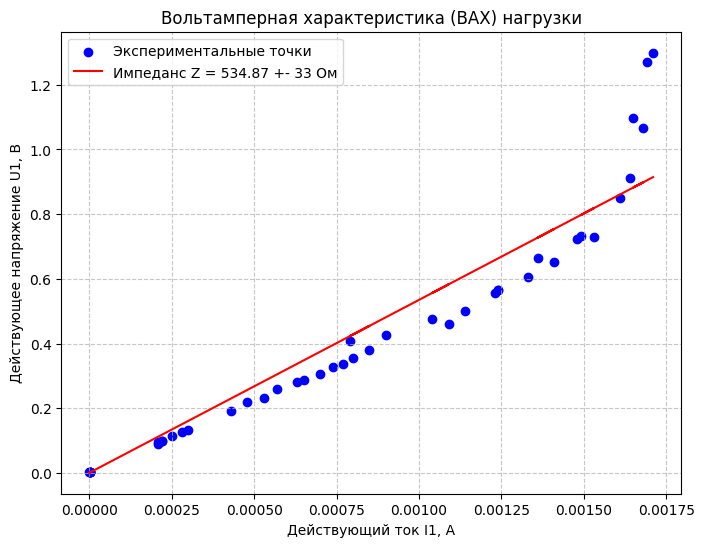

In [39]:
df = pd.read_excel('lab8_2.xlsx')

vax_data = df[['IOm', 'UOm']].dropna().drop_duplicates()

x = vax_data['IOm'].values.reshape(-1, 1) # Действующий ток
y = vax_data['UOm'].values                # Действующее напряжение

# 2. Линейная регрессия
model = LinearRegression(fit_intercept=False)
model.fit(x, y)
z_average = model.coef_[0]

# 3. Построение
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Экспериментальные точки')
plt.plot(x, model.predict(x), color='red', label=f'Импеданс Z = {z_average:.2f} +- 33 Ом')

plt.title('Вольтамперная характеристика (ВАХ) нагрузки')
plt.xlabel('Действующий ток I1, А')
plt.ylabel('Действующее напряжение U1, В')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('3_2.png')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Загрузка
df = pd.read_excel('lab8_2.xlsx')

# Константы и их погрешности (согласно вашему правилу)
sigma_f = 0.005
sigma_u = 0.1
sigma_i = 0.0001
sigma_r = 0.005
sigma_pi = 0.005
PI = 3.14

# Очистка от дублей (берем только строки с разными частотами)
df_clean = df[['F', 'U1', 'I1', 'X', 'L', 'R']].dropna().drop_duplicates().copy()

# 1. Погрешность периода d_T1 и d_T2 (они равны, т.к. зависят от F)
df_clean['d_T'] = sigma_f / (df_clean['F']**2)


U = df_clean['U1']
I = df_clean['I1']
R = df_clean['R']
XL = df_clean['X']

term_u = (U / (I**2 * XL)) * sigma_u
term_i = (U**2 / (I**3 * XL)) * sigma_i
term_r = (R / XL) * sigma_r
df_clean['d_Xl'] = np.sqrt(term_u**2 + term_i**2 + term_r**2)

term_xl = (1 / (2 * PI * df_clean['F'])) * df_clean['d_Xl']
term_f = (XL / (2 * PI * df_clean['F']**2)) * sigma_f
term_pi = (XL / (2 * PI**2 * df_clean['F'])) * sigma_pi
df_clean['d_L'] = np.sqrt(term_xl**2 + term_f**2 + term_pi**2)

# Вывод средних значений
print("--- СРЕДНИЕ ЗНАЧЕНИЯ ПОГРЕШНОСТЕЙ ---")
print(f"Средняя d_T:  {df_clean['d_T'].mean() * 1000:.6f} мс")
print(f"Средняя d_Xl: {df_clean['d_Xl'].mean():.2f} Ом")
print(f"Средняя d_L:  {df_clean['d_L'].mean():.4f} Гн")

# Сохранение в новый файл
df_clean.to_excel('lab8_with_errors.xlsx', index=False)
print("\nФайл 'lab8_with_errors.xlsx' успешно создан.")

# Новые значения погрешностей для Z, которые ты указал
sigma_u_z = 0.01
sigma_i_z = 0.0001

# 1. Сначала считаем сам импеданс Z
df_clean['Z'] = df_clean['U1'] / df_clean['I1']

# 2. Считаем слагаемые (частные производные на погрешности)
term_z_u = (1 / df_clean['I1']) * sigma_u_z
term_z_i = (df_clean['U1'] / (df_clean['I1']**2)) * sigma_i_z

# 3. Итоговая погрешность импеданса d_Z
df_clean['d_Z'] = np.sqrt(term_z_u**2 + term_z_i**2)

# Добавим вывод в консоль
print(f"Средняя d_Z:  {df_clean['d_Z'].mean():.4f} Ом")

--- СРЕДНИЕ ЗНАЧЕНИЯ ПОГРЕШНОСТЕЙ ---
Средняя d_T:  0.013850 мс
Средняя d_Xl: 23.41 Ом
Средняя d_L:  0.1962 Гн

Файл 'lab8_with_errors.xlsx' успешно создан.
Средняя d_Z:  32.5947 Ом


70.64798874650955


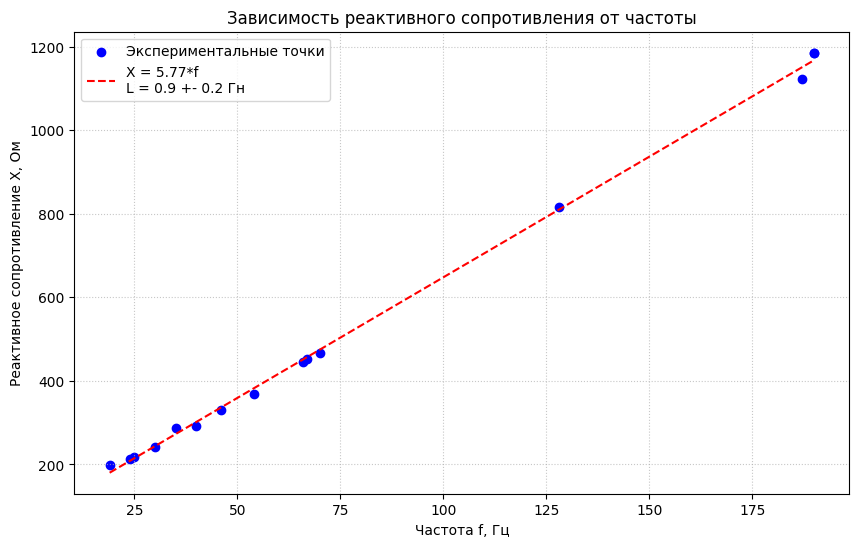

Угловой коэффициент k: 5.7726
 L: 0.9192 Гн


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Загрузка данных
df = pd.read_excel('lab8_2.xlsx')

# 2. Подготовка данных: берем только уникальные пары частота-сопротивление
# (убираем повторы, возникающие из-за временных рядов в таблице)
data_clean = df[['F', 'X']].dropna().drop_duplicates().sort_values(by='F')

f = data_clean['F'].values.reshape(-1, 1)
x_l = data_clean['X'].values

# 3. Линейная регрессия для определения индуктивности L
# X_L = (2 * pi * L) * f  => y = k * x
model = LinearRegression(fit_intercept=True)
model.fit(f, x_l)
k = model.coef_[0]
print(model.intercept_)
# Константа Пи по вашему правилу
PI = 3.14
L_calculated = k / (2 * PI)

# 4. Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(f, x_l, color='blue', label='Экспериментальные точки')
plt.plot(f, model.predict(f), color='red', linestyle='--',
         label=f'X = {k:.2f}*f\nL = {L_calculated:.1f} +- 0.2 Гн')

plt.title('Зависимость реактивного сопротивления от частоты')
plt.xlabel('Частота f, Гц')
plt.ylabel('Реактивное сопротивление X, Ом')
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.savefig('4_3.png')
plt.show()

print(f"Угловой коэффициент k: {k:.4f}")
print(f" L: {L_calculated:.4f} Гн")

LaTex Formulas


ФОРМУЛЫ ОСНОВНЫЕ:

Полное сопротивление (Импеданс):$$Z = \frac{U}{I}$$
Реактивное сопротивление катушки:$$X_L = \sqrt{Z^2 - R^2} = \sqrt{\left(\frac{U}{I}\right)^2 - R^2}$$
Индуктивность катушки:$$L = \frac{X_L}{2\pi f}$$
Период переменного тока:$$T = \frac{1}{f}$$


ФОРМУЛЫ ПОГРЕШНОСТИ:

Погрешность периода:$$\Delta T = \frac{\Delta f}{f^2}$$
Погрешность реактивного сопротивления $$\Delta X_L = \sqrt{\left( \frac{U}{I^2 X_L} \Delta U \right)^2 + \left( \frac{U^2}{I^3 X_L} \Delta I \right)^2 + \left( \frac{R}{X_L} \Delta R \right)^2}$$
Погрешность индуктивности $$\Delta L = \sqrt{\left( \frac{1}{2\pi f} \Delta X_L \right)^2 + \left( \frac{X_L}{2\pi f^2} \Delta f \right)^2 + \left( \frac{X_L}{2\pi^2 f} \Delta \pi \right)^2}$$

